# Sanbercode Basic Python for Data Science
# Final Project Guide
---
---
---

## 1. Business/Project Understanding

- Explain project's background and requirement.

Problem :
HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

Solusi :
Membuat model unsupervised learning berupa klustering dengan mengelompokkan negara menjadi beberapa bagian sehingga dapat diputuskan prioritas negara mana saja yang menjadi fokus untuk mendapatkan bantuan.


## 2. The Data

### 2.1 Dataset Understanding
1. Elaborate the source data you're working with.
    -  What are the dataset's features?
    -  How many rows it has?

### 2.2 EDA Part 1
1. Do multivariate analysis on the dataset to catch the glimpse of the relation between datasets' features.


### 2.3 Feature Selection
1. Choose 2 features of the dataset to be used as the base of analyses and clustering.<b>*</b>
2. Elaborate the reason you chose them.
    
### 2.4 Data Cleaning
1. Missing values
    - Check if exist.
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
<br><br>
2. Ouliers
    - Check if exist (Even better if graphical representation is used).
    - Handle if exist.
    - Recheck after handling (see the handling result).
    - Elaborate how exactly you handle them.
    - Elaborate why do you handle them in such way.
    
### 2.5 EDA Part 2
1. Do univariate analyses on selected features. Elaborate what information you can extract from this.
2. Do bivariate analyses between selected features. Elaborate what information you can extract from this.

---
---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df = pd.read_csv('Data_Negara_HELP.csv')
display(df)
df.isnull().sum()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

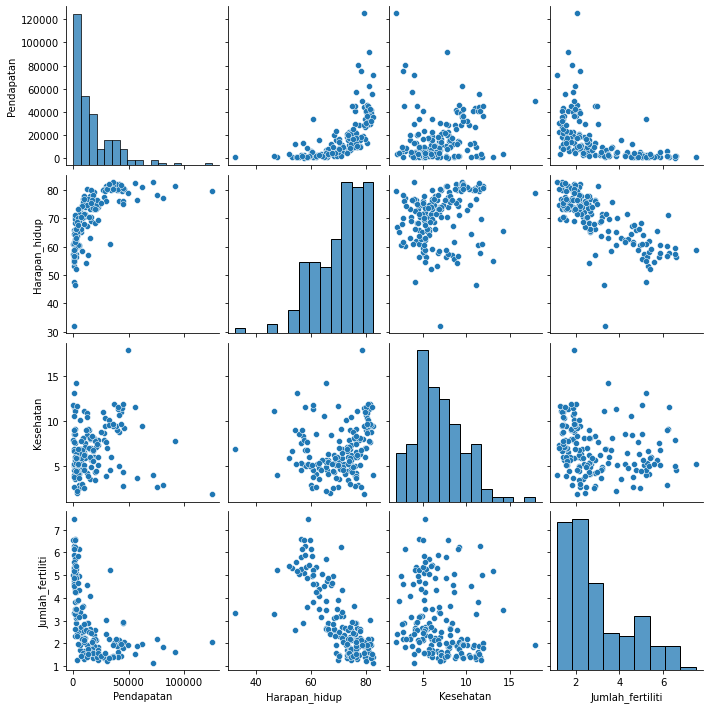

In [107]:

sns.pairplot(df, x_vars=["Pendapatan", "Harapan_hidup", "Kesehatan", "Jumlah_fertiliti"],
    y_vars=["Pendapatan", "Harapan_hidup", "Kesehatan", "Jumlah_fertiliti"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [53]:
#Select the feature we are going to use
df_pakai = df[['Pendapatan','Harapan_hidup']].copy()
df_pakai

---
#Menggunakan pendapatan dan harapan hidup karena 2 variabel ini memiliki hubungan yang cukup berkaitan. Dimana 
#pendapatan tinggi dapat meningkatkan harapan hidup karena memiliki kecenderungan terbebas dari masalah ekonomi.

,Pendapatan,Harapan_hidup
0,1610,56.2
1,9930,76.3
2,12900,76.5
3,5900,60.1
4,19100,76.8
...,...,...
162,2950,63.0
163,16500,75.4
164,4490,73.1
165,4480,67.5


<AxesSubplot:xlabel='Pendapatan'>

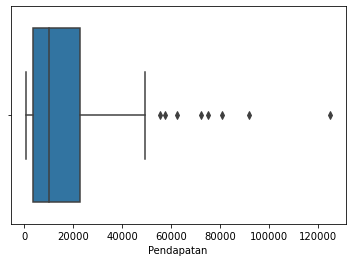

In [7]:
#Pengecekan outlier ekonomi
display(sns.boxplot(x='Pendapatan', data= df_pakai))

<AxesSubplot:xlabel='Harapan_hidup'>

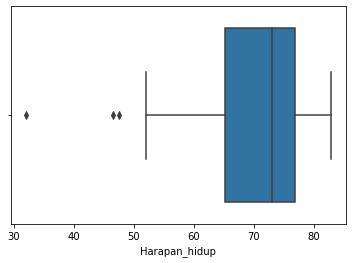

In [8]:
#Pengecekan outlier ekonomi
display(sns.boxplot(x='Harapan_hidup', data= df_pakai))

In [9]:
#Handling Outlier
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final =df_pakai[~((df_pakai<(Q1-1.5*IQR)) | (df_pakai>(Q3+1.5*IQR)))]
    return df_final
df_outlier_removed = remove_outlier_IQR(df[['Pendapatan','Harapan_hidup']])

df_outlier_removed.dropna(axis = 0, inplace = True)
df_outlier_removed

,Pendapatan,Harapan_hidup
0,1610.0,56.2
1,9930.0,76.3
2,12900.0,76.5
3,5900.0,60.1
4,19100.0,76.8
...,...,...
162,2950.0,63.0
163,16500.0,75.4
164,4490.0,73.1
165,4480.0,67.5


In [12]:
df_outlier_removed

,Pendapatan,Harapan_hidup
0,1610.0,56.2
1,9930.0,76.3
2,12900.0,76.5
3,5900.0,60.1
4,19100.0,76.8
...,...,...
162,2950.0,63.0
163,16500.0,75.4
164,4490.0,73.1
165,4480.0,67.5


In [13]:
#Feature Scalling

sc = StandardScaler()
df_scal = sc.fit_transform(df_outlier_removed)


df_scal_baru = pd.DataFrame(df_scal, columns=['Pendapatan','Harapan_hidup'])

df_scal_baru

,Pendapatan,Harapan_hidup
0,-0.968447,-1.819188
1,-0.335927,0.714906
2,-0.110135,0.740121
3,-0.642304,-1.327498
4,0.361214,0.777943
...,...,...
151,-0.866575,-0.961883
152,0.163552,0.601439
153,-0.749498,0.311468
154,-0.750258,-0.394548


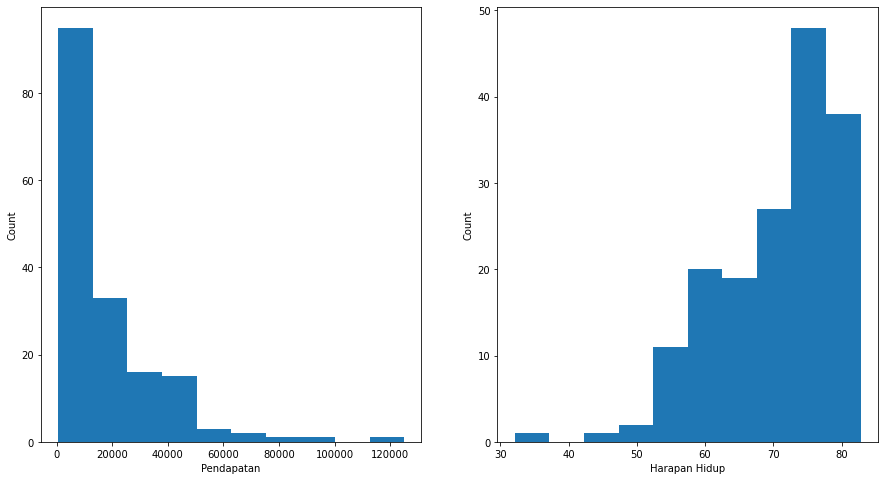

In [79]:
#Univariate Analysis

fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].hist(df_pakai['Pendapatan'])
ax[0].set_xlabel('Pendapatan')
ax[0].set_ylabel('Count')

ax[1].hist(df_pakai['Harapan_hidup'])
ax[1].set_xlabel('Harapan Hidup')
ax[1].set_ylabel('Count')
plt.show()

In [ ]:
#Negara negara yang ada  memiliki pendapatan yang cukup rendah memiliki frekuensi tinggi
#Angka harapan hidup mencapai 70 hingga 80 tahun memiliki frekuensi yang cukup banyak

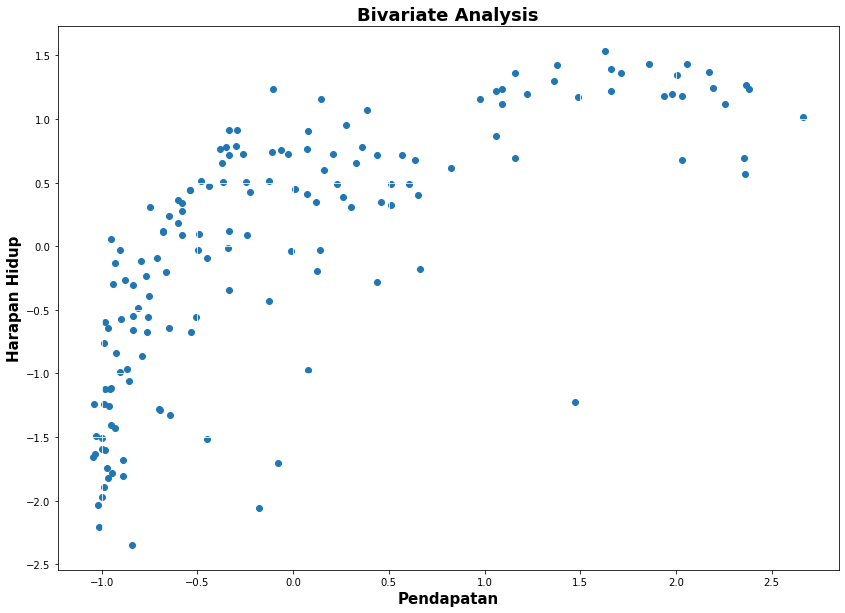

In [80]:
fig, ax = plt.subplots(figsize=(14,10))

#plot the data
ax.scatter(df_scal_baru['Pendapatan'], df_scal_baru['Harapan_hidup'])

ax.set_title('Bivariate Analysis', fontsize=18, weight='bold')
ax.set_xlabel('Pendapatan', fontsize=15, weight='bold')
ax.set_ylabel('Harapan Hidup', fontsize=15, weight='bold')

plt.grid(color='white', zorder=0)

plt.show()

 Terlihat adanya hubungan linier, sehingga peningkatan pendapatan akan berpengaruh pada harapan hidup

## 3. Clustering

1. Decide the number of clusters, you're free to choose the method:
    - Elbow method
    - Silhouette score method
    - Directly decide the number (Elaborate the number and why)
<br><br>
2. Do clustering with the decided amount of cluster.
<br><br>
3. Create the clustering result graph.

In [15]:
def elbowMethod(X, k_min=1, k_max=10, save=False):
    K_range = range(k_min,k_max+1)

    result = []
    for k in K_range:
        model = KMeans(n_clusters = k)
        model.fit(X)
        result.append(model.inertia_)
        
    fig, ax = plt.subplots(figsize=(15,8))
    
    ax.plot(K_range, result, marker='o')
    
    for i, value in enumerate(result):
        ax.text(i+1.15, value-0.005, round(value,2), fontsize=13, fontweight='bold')
    
    plt.xticks(K_range)
    plt.grid()
    plt.title('Elbow Method\n', fontsize=18)
    plt.xlabel('\nn-Cluster', fontsize=15)
    plt.ylabel('WCSS\n', fontsize=15)
    
    if save==True:
        plt.savefig('elbowMethod.png', dpi=200)
    
    plt.show()

In [16]:
def silMethod(X, k_min=2, k_max=10, save=False):
    K_range2 = range(k_min,k_max+1)

    result_sm = []
    for k in K_range2:
        model2 = KMeans(n_clusters = k)
        model2.fit(df_outlier_removed)
        labels = model2.labels_
    
        s_score = silhouette_score(X, labels, metric='euclidean')
        result_sm.append(s_score)
        
    fig2, ax2 = plt.subplots(figsize=(15,8))
    ax2.plot(K_range2, result_sm, marker='o')
    
    for i, value in enumerate(result_sm):
        ax2.text(i+2.15, value-0.005, round(value,2), fontsize=13, fontweight='bold')
    
    plt.xticks(K_range2)
    plt.grid()
    plt.title('Silhouette Method\n', fontsize=18)
    plt.xlabel('\nn-Cluster', fontsize=15)
    plt.ylabel('Silhouette Score\n', fontsize=15)
    if save==True:
        plt.savefig('silMethod.png', dpi=200)
    plt.show()

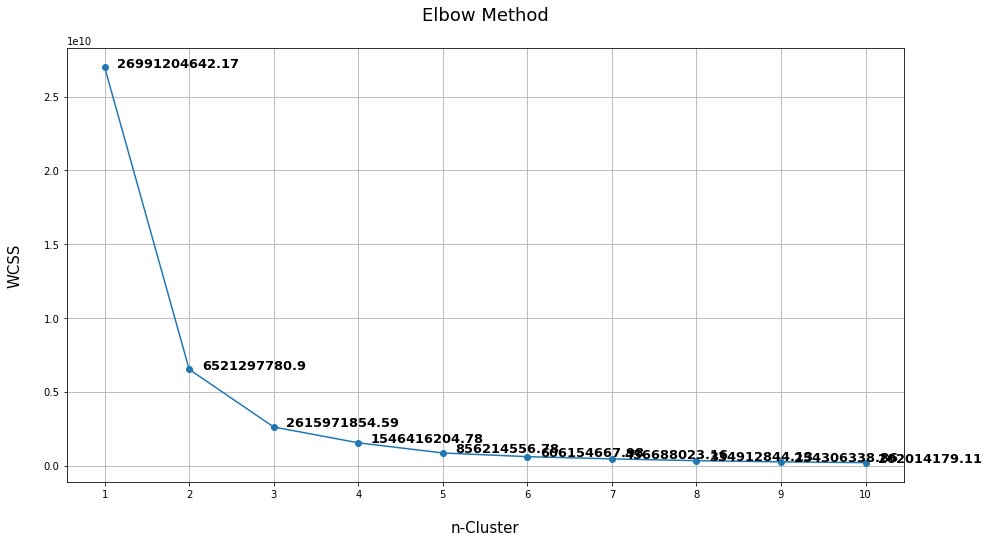

In [17]:
elbowMethod(df_outlier_removed)

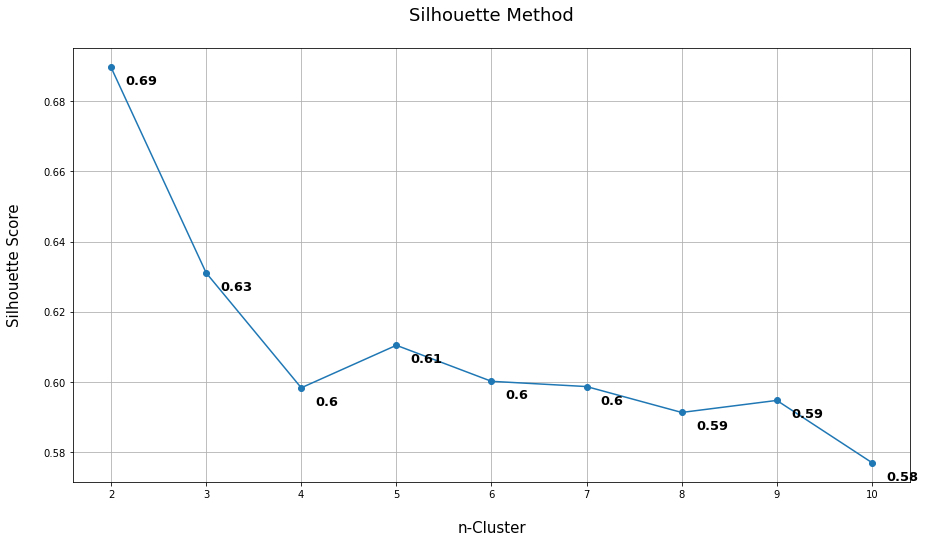

In [18]:
silMethod(df_outlier_removed)

In [19]:
#Clustering dengan 3 klaster menggunakan K-Means Algortihm
k3 = KMeans(n_clusters=3, random_state=9)

k3.fit(df_scal_baru)
df_scal_baru['Cluster'] = k3.labels_

df_scal_baru

,Pendapatan,Harapan_hidup,Cluster
0,-0.968447,-1.819188,1
1,-0.335927,0.714906,2
2,-0.110135,0.740121,2
3,-0.642304,-1.327498,1
4,0.361214,0.777943,2
...,...,...,...
151,-0.866575,-0.961883,1
152,0.163552,0.601439,2
153,-0.749498,0.311468,2
154,-0.750258,-0.394548,1


In [20]:
df_scal_baru['Cluster'].value_counts()

2    74
1    52
0    30
Name: Cluster, dtype: int64

## 4. Recommendation

1. Choose which country cluster to focus.
<br><br>
2. Show which countries included in that cluster.
<br><br>
3. Among those countries, choose the best coutries to receive help
    - Remember, USD 10 Mil. is a small amount for this kind of cause, choose the countries wisely.
    - Elaborate the reason you chose them.

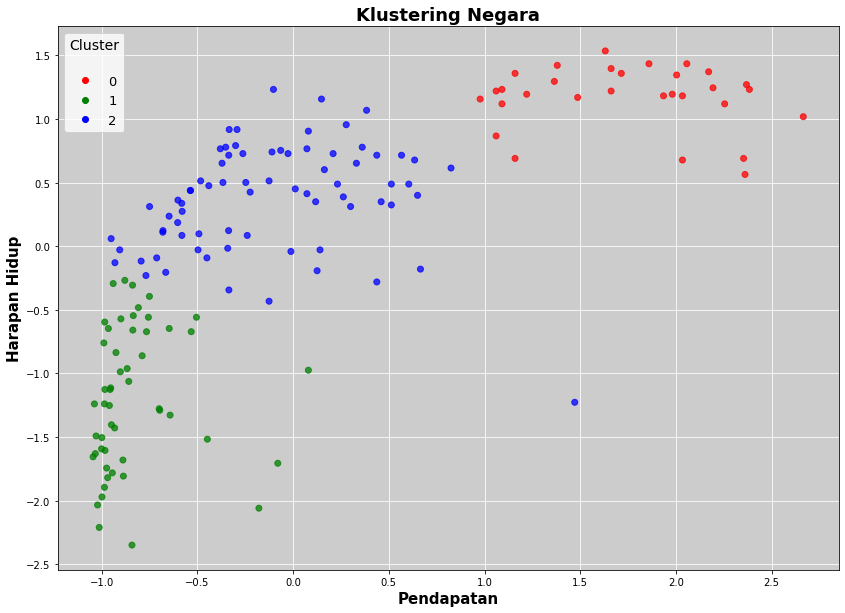

In [21]:
fig, ax = plt.subplots(figsize=(14,10))

#Create custom color dictionary
colorDict = {0:'r', 1:'g', 2:'b'}

#set axes bg color
ax.patch.set_facecolor('#CCCCCC')

#plot the data
ax.scatter(df_scal_baru['Pendapatan'], df_scal_baru['Harapan_hidup'],
           c=df_scal_baru['Cluster'].map(colorDict), alpha=0.75, zorder=2)

ax.set_title('Klustering Negara', fontsize=18, weight='bold')
ax.set_xlabel('Pendapatan', fontsize=15, weight='bold')
ax.set_ylabel('Harapan Hidup', fontsize=15, weight='bold')

#Create list of marker objects for legend parameter input
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

#Create the legend
plt.legend(markers, list(colorDict.keys())[:4], prop={'size':13},
           title='Cluster\n', title_fontsize=14)

plt.grid(color='white', zorder=0)

plt.show()


In [22]:
#Display Centroids
centroid_k3 = k3.cluster_centers_
centroid_k3 = sc.inverse_transform(centroid_k3)
centroid_k3

array([[37310.        ,    79.93      ],
       [ 3397.59615385,    61.14423077],
       [12735.40540541,    73.52432432]])

In [23]:
#X axis of Centroid
centroidX = centroid_k3[:,0]
centroidX

array([37310.        ,  3397.59615385, 12735.40540541])

In [24]:
#Y axis of Centroid
centroidY = centroid_k3[:,1]
centroidY

array([79.93      , 61.14423077, 73.52432432])

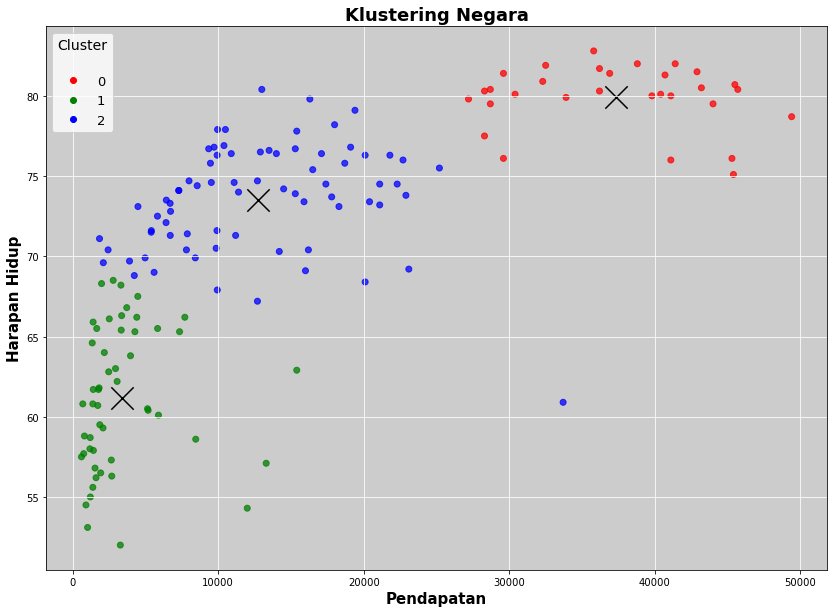

In [25]:
fig, ax = plt.subplots(figsize=(14,10))

#Create custom color dictionary
colorDict = {0:'r', 1:'g', 2:'b'}

#set axes bg color
ax.patch.set_facecolor('#CCCCCC')

#plot the data
ax.scatter(df_outlier_removed['Pendapatan'], df_outlier_removed['Harapan_hidup'], alpha=0.75, c=df_scal_baru['Cluster'].map(colorDict))

#plot the centroids
ax.scatter(centroidX, centroidY, c='black', marker='x', s =500)

ax.set_title('Klustering Negara', fontsize=18, weight='bold')
ax.set_xlabel('Pendapatan', fontsize=15, weight='bold')
ax.set_ylabel('Harapan Hidup', fontsize=15, weight='bold')

#Create list of marker objects for legend parameter input
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

#Create the legend
plt.legend(markers, list(colorDict.keys())[:4], prop={'size':13},
           title='Cluster\n', title_fontsize=14)

plt.grid(color='white', zorder=0)

plt.show()





In [ ]:
negara = df['Negara']

datanegara = [negara,df_pakai, ]
gabungan = pd.concat(datanegara, axis=1)
final = final.dropna()
final


In [69]:
df_pakai

datanegara = [negara,df_pakai,df_scal_baru['Cluster']]
gabungan = pd.concat(datanegara, axis=1)

final_negara = gabungan.dropna()
final_negara


,Negara,Pendapatan,Harapan_hidup,Cluster
0,Afghanistan,1610,56.2,1.0
1,Albania,9930,76.3,2.0
2,Algeria,12900,76.5,2.0
3,Angola,5900,60.1,1.0
4,Antigua and Barbuda,19100,76.8,2.0
...,...,...,...,...
151,Tonga,4980,69.9,1.0
152,Tunisia,10400,76.9,2.0
153,Turkey,18000,78.2,2.0
154,Turkmenistan,9940,67.9,1.0


Dari data yang ada, maka pemberian bantuan akan diberikan pada negara-negara ber cluster 1. 

In [96]:
Negara_penerima = final_negara[['Negara', 'Cluster']]

cluster_1 = final_negara[final_negara['Cluster'] == 1].reset_index(drop = True)
cluster_1


#Cluster_recommendation = df4[df4['Cluster']==1].reset_index(drop = True)
#Cluster_recommendation

,Negara,Pendapatan,Harapan_hidup,Cluster
0,Afghanistan,1610,56.2,1.0
1,Angola,5900,60.1,1.0
2,Benin,1820,61.8,1.0
3,Botswana,13300,57.1,1.0
4,Bulgaria,15300,73.9,1.0
5,Burkina Faso,1430,57.9,1.0
6,Burundi,764,57.7,1.0
7,Cambodia,2520,66.1,1.0
8,Cape Verde,5830,72.5,1.0
9,China,9530,74.6,1.0


In [110]:
cluster_1_10 = cluster_1[cluster_1['Pendapatan'] < 2000].reset_index(drop = True)
cluster_1_10.head(10)

,Negara,Pendapatan,Harapan_hidup,Cluster
0,Afghanistan,1610,56.2,1.0
1,Benin,1820,61.8,1.0
2,Burkina Faso,1430,57.9,1.0
3,Burundi,764,57.7,1.0
4,Comoros,1410,65.9,1.0
5,Eritrea,1420,61.7,1.0
6,Guinea,1190,58.0,1.0
7,Haiti,1500,32.1,1.0
8,Liberia,700,60.8,1.0
9,Madagascar,1390,60.8,1.0


## 5. Deliverables

1. What:
    - PDF file of the report presentation slide.
    - Notebook (.ipynb) file
<br><br>
2. How:
    - Pack them into compressed archive file (.zip/.rar).
    - Upload them to google drive.
    - Submit the link to sanbercode web.